<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%204/Modulo_4_Ejercicio_2_Clasificacion_Desbalanceada_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 2: Evaluación de Métricas en un Problema de Clasificación Desbalanceado**
#### Análisis del impacto del desbalance de clases en la evaluación de modelos de clasificación

### **Introducción**
En este ejercicio, exploraremos cómo las métricas de evaluación cambian en un problema de **clasificación desbalanceado**, y aplicaremos técnicas para mejorar el rendimiento del modelo en este escenario.

El dataset que utilizaremos presenta una distribución de clases donde **95% de los registros son de la clase 'OK' y solo 5% de la clase 'KO'**, lo que puede generar problemas en la evaluación de modelos si solo se observa la exactitud (accuracy).

Para abordar este problema, entrenaremos un modelo de **Random Forest**, analizaremos métricas como **Precisión, Recall, F1 Score y Curva ROC-AUC**, y aplicaremos **SMOTE** para balancear el dataset.

In [1]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset `control_calidad_circuitos_electronicos.csv`, que contiene información sobre circuitos electrónicos y su estado de calidad. El objetivo es clasificar si un circuito fallará (**KO**) o funcionará correctamente (**OK**).

In [2]:
# Celda 2: Carga del dataset
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_circuitos_electronicos.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_componente,Voltaje_operación,Corriente_fuga,Resistencia_circuito,Frecuencia_operación,Temperatura_prueba,Horas_operación,Proveedor_material,Modelo_chip,Método_prueba,Fallo_circuito
0,1,5.248357,1.934405,1055.302146,2.415568,71.648138,6826.235678,Proveedor_2,Modelo_8,Método_C,OK
1,2,4.930868,2.114882,1208.739222,2.379194,74.617461,4889.806377,Proveedor_5,Modelo_8,Método_C,OK
2,3,5.323844,2.220543,1000.776616,2.362610,83.187345,4272.656141,Proveedor_4,Modelo_10,Método_B,KO
3,4,5.761515,1.644991,792.359071,2.120637,71.668613,4639.328169,Proveedor_4,Modelo_2,Método_C,OK
4,5,4.882923,2.030222,1235.237438,2.320803,77.624833,6439.710569,Proveedor_3,Modelo_14,Método_C,OK


In [3]:
# Celda 3: Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126000 entries, 0 to 125999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_componente         126000 non-null  int64  
 1   Voltaje_operación     126000 non-null  float64
 2   Corriente_fuga        126000 non-null  float64
 3   Resistencia_circuito  126000 non-null  float64
 4   Frecuencia_operación  126000 non-null  float64
 5   Temperatura_prueba    126000 non-null  float64
 6   Horas_operación       113412 non-null  float64
 7   Proveedor_material    126000 non-null  object 
 8   Modelo_chip           126000 non-null  object 
 9   Método_prueba         126000 non-null  object 
 10  Fallo_circuito        126000 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 10.6+ MB


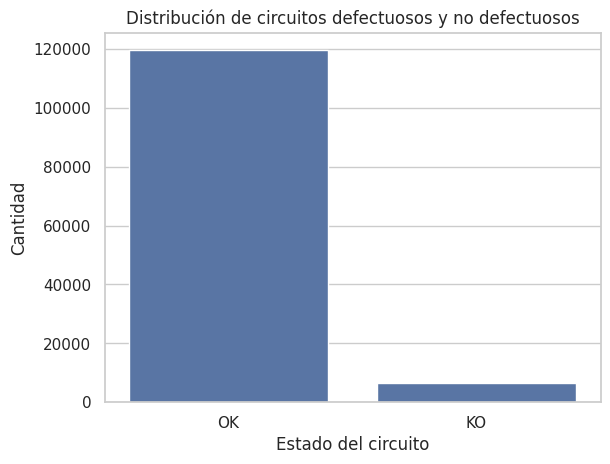

In [4]:
# Celda 4: Distribución de la variable objetivo
sns.countplot(x='Fallo_circuito', data=data)
plt.title('Distribución de circuitos defectuosos y no defectuosos')
plt.xlabel('Estado del circuito')
plt.ylabel('Cantidad')
plt.show()

### **Preprocesamiento de los datos**
Se seleccionan las variables numéricas y se normalizan antes de entrenar el modelo. Además, convertimos la variable objetivo en valores numéricos para su uso en modelos de machine learning.

In [5]:
# Celda 5: Normalización de los datos
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las variables numéricas
numeric_features = ['Voltaje_operación', 'Corriente_fuga', 'Resistencia_circuito', 'Frecuencia_operación', 'Temperatura_prueba', 'Horas_operación']

X = data[numeric_features]
y = data['Fallo_circuito'].map({'OK': 0, 'KO': 1})  # Convertir etiquetas a valores numéricos

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### **Entrenamiento del modelo sin balanceo**
Se entrenará un modelo de **Random Forest** en el dataset original para analizar el impacto del desbalance de clases.

In [6]:
# Celda 6: Entrenamiento del modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

### **Evaluación del modelo sin balanceo**
Se calculará la **Matriz de Confusión**, Precisión, Recall, F1 Score y la Curva ROC-AUC.

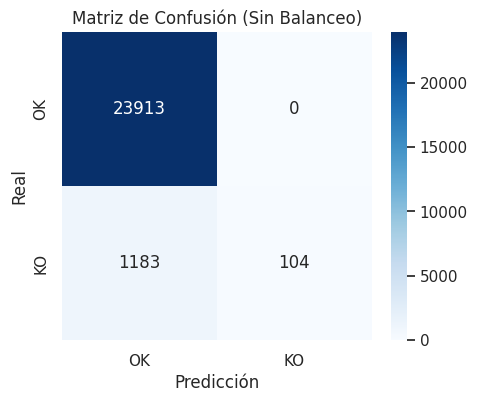

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     23913
           1       1.00      0.08      0.15      1287

    accuracy                           0.95     25200
   macro avg       0.98      0.54      0.56     25200
weighted avg       0.96      0.95      0.93     25200



In [7]:
# Celda 7: Matriz de Confusión y Métricas
matriz_confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['OK', 'KO'], yticklabels=['OK', 'KO'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Sin Balanceo)')
plt.show()

print(classification_report(y_test, y_pred))

### **Aplicación de SMOTE para balancear las clases**
El dataset original está desbalanceado, por lo que aplicaremos **SMOTE** para generar nuevas muestras sintéticas de la clase minoritaria y entrenaremos el modelo nuevamente.

In [8]:
# Celda 8: Aplicar SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
sns.countplot(x=y_train_resampled)
plt.title('Distribución después de aplicar SMOTE')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Celda 9: Entrenar modelo con datos balanceados
modelo_smote = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_smote.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones
y_pred_smote = modelo_smote.predict(X_test)

In [ ]:
# Celda 10: Evaluación del modelo balanceado
print(classification_report(y_test, y_pred_smote))

### **Conclusiones**
Se compararon dos modelos: uno con datos desbalanceados y otro con **SMOTE**. El modelo balanceado mostró mejoras en **Recall y F1 Score**, indicando una mejor detección de fallos reales.